# Gaelic ( irish ) Song Generation

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM, GRU, Embedding, Bidirectional, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

In [2]:
# the irish song is separated by \n for the new line
data = "In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."


In [3]:
data = data.lower().split('\n')
data

['in the town of athy one jeremy lanigan ',
 ' battered away til he hadnt a pound. ',
 'his father died and made him a man again ',
 ' left him a farm and ten acres of ground. ',
 'he gave a grand party for friends and relations ',
 'who didnt forget him when come to the wall, ',
 'and if youll but listen ill make your eyes glisten ',
 'of the rows and the ructions of lanigans ball. ',
 'myself to be sure got free invitation, ',
 'for all the nice girls and boys i might ask, ',
 'and just in a minute both friends and relations ',
 'were dancing round merry as bees round a cask. ',
 'judy odaly, that nice little milliner, ',
 'she tipped me a wink for to give her a call, ',
 'and i soon arrived with peggy mcgilligan ',
 'just in time for lanigans ball. ',
 'there were lashings of punch and wine for the ladies, ',
 'potatoes and cakes; there was bacon and tea, ',
 'there were the nolans, dolans, ogradys ',
 'courting the girls and dancing away. ',
 'songs they went round as plenty as wat

In [14]:
# just tokenizing the words and generating the sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data)


total_words = len(tokenizer.word_index)+1
print(tokenizer.word_index)
print('\n')
print(total_words)

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [16]:
data[0]

'in the town of athy one jeremy lanigan '

In [21]:
tokenizer.texts_to_sequences([data[0]])[0]

[4, 2, 66, 8, 67, 68, 69, 70]

In [22]:
input_sequences = []
for line in data :
    seq = tokenizer.texts_to_sequences([line])[0]
    for i in range(1,len(seq)):
        n_gram_sequence = seq[:i+1]
        input_sequences.append(n_gram_sequence)

In [23]:
input_sequences

[[4, 2],
 [4, 2, 66],
 [4, 2, 66, 8],
 [4, 2, 66, 8, 67],
 [4, 2, 66, 8, 67, 68],
 [4, 2, 66, 8, 67, 68, 69],
 [4, 2, 66, 8, 67, 68, 69, 70],
 [71, 40],
 [71, 40, 20],
 [71, 40, 20, 21],
 [71, 40, 20, 21, 72],
 [71, 40, 20, 21, 72, 3],
 [71, 40, 20, 21, 72, 3, 73],
 [16, 74],
 [16, 74, 75],
 [16, 74, 75, 1],
 [16, 74, 75, 1, 76],
 [16, 74, 75, 1, 76, 33],
 [16, 74, 75, 1, 76, 33, 3],
 [16, 74, 75, 1, 76, 33, 3, 77],
 [16, 74, 75, 1, 76, 33, 3, 77, 22],
 [41, 33],
 [41, 33, 3],
 [41, 33, 3, 78],
 [41, 33, 3, 78, 1],
 [41, 33, 3, 78, 1, 79],
 [41, 33, 3, 78, 1, 79, 80],
 [41, 33, 3, 78, 1, 79, 80, 8],
 [41, 33, 3, 78, 1, 79, 80, 8, 81],
 [21, 82],
 [21, 82, 3],
 [21, 82, 3, 83],
 [21, 82, 3, 83, 84],
 [21, 82, 3, 83, 84, 7],
 [21, 82, 3, 83, 84, 7, 42],
 [21, 82, 3, 83, 84, 7, 42, 1],
 [21, 82, 3, 83, 84, 7, 42, 1, 43],
 [85, 86],
 [85, 86, 87],
 [85, 86, 87, 33],
 [85, 86, 87, 33, 44],
 [85, 86, 87, 33, 44, 88],
 [85, 86, 87, 33, 44, 88, 13],
 [85, 86, 87, 33, 44, 88, 13, 2],
 [85, 86, 

In [25]:
max_sequence_len = max([len(i) for i in input_sequences])
max_sequence_len

11

In [27]:
type(input_sequences)

list

In [26]:
import numpy as np

In [28]:
input_sequences = np.array(pad_sequences(input_sequences,maxlen=11,padding='pre'))
input_sequences

array([[  0,   0,   0, ...,   0,   4,   2],
       [  0,   0,   0, ...,   4,   2,  66],
       [  0,   0,   0, ...,   2,  66,   8],
       ...,
       [  0,   0,   0, ...,  60, 262,  13],
       [  0,   0,   0, ..., 262,  13,   9],
       [  0,   0,   0, ...,  13,   9,  10]])

In [29]:
xs , labels = input_sequences[:,:-1], input_sequences[:,-1]
xs

array([[  0,   0,   0, ...,   0,   0,   4],
       [  0,   0,   0, ...,   0,   4,   2],
       [  0,   0,   0, ...,   4,   2,  66],
       ...,
       [  0,   0,   0, ...,  61,  60, 262],
       [  0,   0,   0, ...,  60, 262,  13],
       [  0,   0,   0, ..., 262,  13,   9]])

In [30]:
labels

array([  2,  66,   8,  67,  68,  69,  70,  40,  20,  21,  72,   3,  73,
        74,  75,   1,  76,  33,   3,  77,  22,  33,   3,  78,   1,  79,
        80,   8,  81,  82,   3,  83,  84,   7,  42,   1,  43,  86,  87,
        33,  44,  88,  13,   2,  45,  89,  90,  91,  92,  93,  94,  95,
        96,  97,   2,  98,   1,   2,  99,   8,   9,  10,  13, 100, 101,
        23, 102, 103,   5,   2,  47,  17,   1,  24,   6, 104, 105,  48,
         4,   3, 106, 107,  42,   1,  43,  49,  25,  50,  18, 108,  25,
         3, 109, 111,  26,  47, 112, 113,  51,  52,   3, 114,   7,  13,
       115,  27,   3, 116,   6,  53, 117, 118, 119, 120,   4,  54,   7,
         9,  10,  11, 121,   8, 122,   1, 123,   7,   2, 124,   1, 126,
        28,  34, 127,   1, 128,  11,   2, 129, 130, 131,   2,  17,   1,
        49,  40,  19, 134,  25,  18, 135,  18, 136, 137,  26, 138, 139,
         4, 140,  55, 141, 143, 144,   1,   2, 145, 146, 147, 148, 149,
        12,   9,  10,  11, 150,   5, 151,   8, 152, 153,  25,   

In [31]:
len(labels)

453

In [32]:
len(tokenizer.word_index)

262

In [39]:
ys = tf.keras.utils.to_categorical(labels, num_classes=len(tokenizer.word_index)+1) # doing one hot encoding
ys[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [40]:
ys.shape

(453, 263)

In [41]:
print(tokenizer.word_index['in'])

4


In [45]:
len(xs[0])

10

In [43]:
xs.shape

(453, 10)

In [46]:
total_words

263

In [48]:
model = Sequential()
model.add(Embedding(total_words,64,input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
hist = model.fit(xs,ys,epochs=500)

Train on 453 samples
Epoch 1/500
453/453 [==============================] - 23s 51ms/sample - loss: 5.5675 - accuracy: 0.0132
Epoch 2/500
453/453 [==============================] - 0s 1ms/sample - loss: 5.5380 - accuracy: 0.0574
Epoch 3/500
453/453 [==============================] - 0s 1ms/sample - loss: 5.4598 - accuracy: 0.0574
Epoch 4/500
453/453 [==============================] - 1s 1ms/sample - loss: 5.2611 - accuracy: 0.0530
Epoch 5/500
453/453 [==============================] - 1s 1ms/sample - loss: 5.1200 - accuracy: 0.0508
Epoch 6/500
453/453 [==============================] - 0s 1ms/sample - loss: 5.0611 - accuracy: 0.0508
Epoch 7/500
453/453 [==============================] - 0s 1ms/sample - loss: 5.0262 - accuracy: 0.0508
Epoch 8/500
453/453 [==============================] - 0s 1ms/sample - loss: 4.9933 - accuracy: 0.0508
Epoch 9/500
453/453 [==============================] - 1s 1ms/sample - loss: 4.9649 - accuracy: 0.0552
Epoch 10/500
453/453 [============================

453/453 [==============================] - 1s 1ms/sample - loss: 2.4723 - accuracy: 0.5342
Epoch 80/500
453/453 [==============================] - 1s 1ms/sample - loss: 2.4453 - accuracy: 0.5342
Epoch 81/500
453/453 [==============================] - 0s 1ms/sample - loss: 2.4474 - accuracy: 0.5298
Epoch 82/500
453/453 [==============================] - 0s 1ms/sample - loss: 2.4226 - accuracy: 0.5408
Epoch 83/500
453/453 [==============================] - 0s 1ms/sample - loss: 2.3919 - accuracy: 0.54300s - loss: 2.3528 - accura
Epoch 84/500
453/453 [==============================] - 0s 1ms/sample - loss: 2.3678 - accuracy: 0.5607
Epoch 85/500
453/453 [==============================] - 0s 1ms/sample - loss: 2.3885 - accuracy: 0.5430
Epoch 86/500
453/453 [==============================] - 0s 1ms/sample - loss: 2.3520 - accuracy: 0.5541
Epoch 87/500
453/453 [==============================] - 0s 1ms/sample - loss: 2.3101 - accuracy: 0.5784
Epoch 88/500
453/453 [=============================

453/453 [==============================] - 0s 1ms/sample - loss: 1.1383 - accuracy: 0.8499
Epoch 155/500
453/453 [==============================] - 0s 1ms/sample - loss: 1.1257 - accuracy: 0.8565
Epoch 156/500
453/453 [==============================] - 1s 1ms/sample - loss: 1.1137 - accuracy: 0.8565
Epoch 157/500
453/453 [==============================] - 0s 1ms/sample - loss: 1.1021 - accuracy: 0.8653
Epoch 158/500
453/453 [==============================] - 1s 1ms/sample - loss: 1.0906 - accuracy: 0.8609
Epoch 159/500
453/453 [==============================] - 0s 1ms/sample - loss: 1.0781 - accuracy: 0.8698
Epoch 160/500
453/453 [==============================] - 1s 1ms/sample - loss: 1.0671 - accuracy: 0.8698
Epoch 161/500
453/453 [==============================] - 0s 1ms/sample - loss: 1.0554 - accuracy: 0.8631
Epoch 162/500
453/453 [==============================] - 0s 592us/sample - loss: 1.0434 - accuracy: 0.8675
Epoch 163/500
453/453 [==============================] - 0s 638us/s

453/453 [==============================] - 0s 820us/sample - loss: 0.5394 - accuracy: 0.9338
Epoch 231/500
453/453 [==============================] - 0s 812us/sample - loss: 0.5339 - accuracy: 0.9316
Epoch 232/500
453/453 [==============================] - 0s 819us/sample - loss: 0.5301 - accuracy: 0.9360
Epoch 233/500
453/453 [==============================] - 0s 725us/sample - loss: 0.5253 - accuracy: 0.9404
Epoch 234/500
453/453 [==============================] - 0s 648us/sample - loss: 0.5194 - accuracy: 0.9360
Epoch 235/500
453/453 [==============================] - 0s 642us/sample - loss: 0.5141 - accuracy: 0.9404
Epoch 236/500
453/453 [==============================] - 0s 647us/sample - loss: 0.5101 - accuracy: 0.9426
Epoch 237/500
453/453 [==============================] - 0s 610us/sample - loss: 0.5055 - accuracy: 0.9426
Epoch 238/500
453/453 [==============================] - 0s 634us/sample - loss: 0.5031 - accuracy: 0.9426
Epoch 239/500
453/453 [============================

453/453 [==============================] - 0s 630us/sample - loss: 0.3026 - accuracy: 0.9514
Epoch 306/500
453/453 [==============================] - 0s 642us/sample - loss: 0.2997 - accuracy: 0.9514
Epoch 307/500
453/453 [==============================] - 0s 636us/sample - loss: 0.2970 - accuracy: 0.9514
Epoch 308/500
453/453 [==============================] - 0s 639us/sample - loss: 0.2939 - accuracy: 0.9514
Epoch 309/500
453/453 [==============================] - 0s 594us/sample - loss: 0.2917 - accuracy: 0.9470
Epoch 310/500
453/453 [==============================] - 0s 647us/sample - loss: 0.2895 - accuracy: 0.9536
Epoch 311/500
453/453 [==============================] - 0s 638us/sample - loss: 0.2871 - accuracy: 0.9536
Epoch 312/500
453/453 [==============================] - 0s 654us/sample - loss: 0.2864 - accuracy: 0.9514
Epoch 313/500
453/453 [==============================] - 0s 631us/sample - loss: 0.2843 - accuracy: 0.9536
Epoch 314/500
453/453 [============================

453/453 [==============================] - 0s 647us/sample - loss: 0.1945 - accuracy: 0.9514
Epoch 382/500
453/453 [==============================] - 0s 631us/sample - loss: 0.1942 - accuracy: 0.9514
Epoch 383/500
453/453 [==============================] - 0s 649us/sample - loss: 0.1930 - accuracy: 0.9514
Epoch 384/500
453/453 [==============================] - 0s 589us/sample - loss: 0.1913 - accuracy: 0.9536
Epoch 385/500
453/453 [==============================] - 0s 635us/sample - loss: 0.1903 - accuracy: 0.9514
Epoch 386/500
453/453 [==============================] - 0s 636us/sample - loss: 0.1896 - accuracy: 0.9514 - loss: 0.1916 - accuracy: 0.95
Epoch 387/500
453/453 [==============================] - 0s 645us/sample - loss: 0.1896 - accuracy: 0.9536
Epoch 388/500
453/453 [==============================] - 0s 643us/sample - loss: 0.1879 - accuracy: 0.9536
Epoch 389/500
453/453 [==============================] - 0s 636us/sample - loss: 0.1872 - accuracy: 0.9558
Epoch 390/500
453/4

453/453 [==============================] - 0s 638us/sample - loss: 0.1458 - accuracy: 0.9448
Epoch 457/500
453/453 [==============================] - 0s 640us/sample - loss: 0.1444 - accuracy: 0.9514
Epoch 458/500
453/453 [==============================] - 0s 763us/sample - loss: 0.1441 - accuracy: 0.9492
Epoch 459/500
453/453 [==============================] - 0s 580us/sample - loss: 0.1433 - accuracy: 0.9470
Epoch 460/500
453/453 [==============================] - 0s 637us/sample - loss: 0.1443 - accuracy: 0.9492
Epoch 461/500
453/453 [==============================] - 0s 642us/sample - loss: 0.1427 - accuracy: 0.9514
Epoch 462/500
453/453 [==============================] - 0s 626us/sample - loss: 0.1428 - accuracy: 0.9492
Epoch 463/500
453/453 [==============================] - 0s 646us/sample - loss: 0.1420 - accuracy: 0.9514
Epoch 464/500
453/453 [==============================] - 0s 643us/sample - loss: 0.1418 - accuracy: 0.9492
Epoch 465/500
453/453 [============================

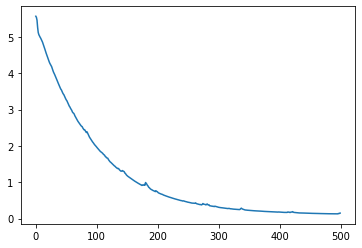

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(hist.history['loss'])

In [50]:
seed_txt = "Laurence went to dublin"
next_words = 100
for i in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_txt])[0]
    token_list = pad_sequences([token_list],maxlen = max_sequence_len-1,padding='pre')
    predicted = model.predict_classes(token_list)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted :
            output_word = word
            break
    seed_txt = seed_txt + " " +output_word
print(seed_txt)

Laurence went to dublin his pipes bellows chanters a fainted and tea replied and ground ground ground ground terrible hullabaloo ned call ask ned ask ask ned call ask ned arrived mcgilligan so drop so too so catchers daughter hall again again taras catchers daughter old hall hall didnt ned hall hall odaly nice didnt saw away weeks weeks new steps for lanigans ball all mad were all might catchers mad didnt i suppose might ask ned ask ask mcgilligan ask nice didnt milliner ned call hall ask relations ground ground ground groups saw didnt swore ned banished wall wall nonsense academy i catchers


Laurence went to dublin round athy one jeremy lanigan eyes glisten glisten glisten glisten glisten glisten glisten put nice gray me them the a jig jig jig jig able polkas her a your glisten glisten glisten glisten glisten died me them of gray and the wall man all the girls they got a call call ask glisten glisten died me them me a polkas polkas polkas polkas red a call water leg eyes gray me creature up fainted gray gray relations relations relations a cask man and father cask cask glisten glisten glisten glisten died me them of the wall jig cask polkas red


In [51]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt


'wget' is not recognized as an internal or external command,
operable program or batch file.
